In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns 


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [3]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

RandomForestClassifier
                   precision    recall  f1-score   support

      b'bathroom'       0.75      0.41      0.53        22
       b'driving'       0.76      0.38      0.51        97
        b'eating'       0.58      0.32      0.41       106
         b'lying'       0.59      0.46      0.52       210
        b'riding'       0.00      0.00      0.00         8
       b'sitting'       0.68      0.77      0.72       517
      b'standing'       0.00      0.00      0.00         3
b'using_computer'       0.74      0.89      0.81       533
       b'walking'       0.75      0.58      0.66        74

         accuracy                           0.70      1570
        macro avg       0.54      0.42      0.46      1570
     weighted avg       0.68      0.70      0.68      1570



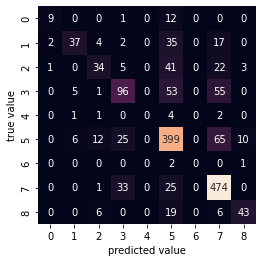

In [4]:
rf = RandomForestClassifier(n_estimators = 200)


fin_test = np.array([])
fin_pred = np.array([])

for i,(train, test) in enumerate(KFold(n_splits=3).split(x)):
    #Train-Test-Split
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    rf.fit(x_train, y_train)

    fin_test = np.concatenate((fin_test, y_test), axis=0)
    fin_pred = np.concatenate((fin_pred, rf.predict(x_test)), axis=0)
    
print("RandomForestClassifier")
print(classification_report(fin_test, fin_pred))

sns.heatmap(confusion_matrix(fin_test, fin_pred), square= True, fmt ='.0f', annot=True, cbar=False)

plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
